In [1]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    sum1 = 0
    for i in range(len(data)):
        sum1 += data[i] * weights[i]
    sum2 = sum(weights)
    print(sum2)
    return sum1 / sum2

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

# Auswertung
Dieses Kapitel befasst sich mit den Möglichkeiten und Tricks der Fehlerrechnung. Normalerweise würde dieses Kapitel separat geführt, jedoch ist das Ziel dieses Versuches, die Fehlerrechnung näher kennenzulernen.

In [2]:
# Evaluate Data

# Read Data
df = pd.read_csv('data/laufzeiten.csv')
s = 2.561
s_u = 0.003
theta = 23

# Calculate mean etc.
mean = df.mean()['t']
sem = df.sem()['t']
std = df.std()['t']

# Calculate velocity & error
v = s / mean
v_u = math.sqrt((s_u / mean)**2 + (-s * sem / mean**2)**2)

error_percent_v = v_u / v * 100
error_percent_t = sem / mean * 100

## Schallgeschwindigkeit

Die Schallgeschwindigkeit soll durch die Mittlere Laufzeit über eine bekannte Strecke bestimmt werden.

### Messwerte

<center>
    <t>Länge der Messstrecke</t>: s = {{s}}±{{s_u}}m  
    <t>Raumtemparatur</t>: $\theta$ = {{theta}}$^{\circ}$C
</center>

Messprotokoll: TODO:

### Mittlere Laufzeit und ihre Unsicherheit

<center>
    <t>Mittlere Laufzeit</t>: $\overline{t}$ = $\frac{1}{20} \sum_{i=1}^{20}{t_i}$ = {{'{0:.2f}'.format(mean*1e3)}}ms  
    <t>Fehler der mittleren Laufzeit</t>: $s_{\overline{i}}$ = $\sqrt{\frac{\sum_{1}^{20}{(t_i-\overline{t})^2}}{20 \cdot 19}}$ = {{'{0:.6f}'.format(sem)}}ms  
    <t>Standardabweichung</t>: s = $\sqrt{\frac{\sum_1^{20}{(t_i-\overline{t})^2}}{19}}$ = {{'{0:.5f}'.format(std)}}ms  
</center>

Mithilfe des zuvor ermittelten Mittelwertes kann die Mittlere Schallgeschwindigkeit als:  
<center>
    c = {{('{0:.2f}'.format(v))}}$\frac{m}{s}$
</center>
festgestellt werden.
Die Unicherheit des Mittelwertes der Schallgeschwindigkeit kann mithilfe des Gauss'schen Fehlerfortpflanzungsgesetztes ersichtlich in (1) errechnet werden.

<center>
$R(x, y)$ = $c(s, t)$ = $\frac{s}{t}$  
$S_{\overline{R}}$ = $\sqrt{(\frac{\partial R}{\partial x}|_{\overline{R}}\cdot s_{\overline{x}})^2 + (\frac{\partial R}{\partial y}|_{\overline{R}}\cdot s_{\overline{y}})^2}$  
$S_{\overline{R}}$ = $\sqrt{(\frac{1}{\overline{t}}s_{\overline{s}})^2+(-\frac{\overline{s}}{\overline{t}^2}s_{\overline{t}})^2}$  
$s_{\overline{s}}$ = {{'{0:.2f}'.format(v_u)}}$\frac{m}{s}$  
<t>Relativer Fehler der Zeit</t>: {{'{0:.2f}'.format(error_percent_t)}}%  
<t>Relativer Fehler der Geschwidigkeit</t>: {{'{0:.2f}'.format(error_percent_v)}}%
</center>

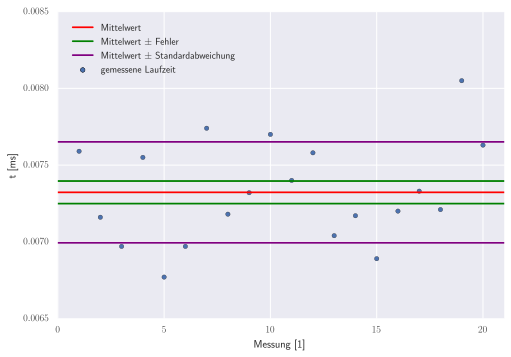

In [3]:
# Plot all values

ax = df.plot(kind='scatter', x='measurement', y='t', label='gemessene Laufzeit')
plt.xlabel('Messung [1]')
plt.xlim([0, len(df['t']) + 1])
plt.ylim([0.0065, 0.0085])
plt.ylabel('t [ms]')
plt.axhline(y=mean, axes=ax, color='red', label='Mittelwert')
plt.axhline(y=mean+sem, axes=ax, color='green', label='Mittelwert ± Fehler')
plt.axhline(y=mean-sem, axes=ax, color='green')
plt.axhline(y=mean+std, axes=ax, color='purple', label='Mittelwert ± Standardabweichung')
plt.axhline(y=mean-std, axes=ax, color='purple')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()
#plt.savefig('laufzeiten.pgf')

## Eisengehalt
### Messwerte

TODO:

In [4]:
# Evaluate Data

# Read Data
df = pd.read_csv('data/eisengehalt.csv')

# Calculate mean etc.
mean = df.mean()['content']
sem = df.sem()['content']
weightedmean = wavg(df, 'content', 'error')
weightedsem = werr(df, 'error')

### Einfacher Mittelwert
Der einfache Mittelwert und sein Fehler ergeben sich analog zu Aufgabe 1. TODO:

<center>
$\overline{x}$ = {{'{0:.2f}'.format(mean)}}%  
$s_{\overline{x}}$ = {{'{0:.2f}'.format(sem)}}%
</center>

### Gewichteter Mittelwert

Der gewichtete Mittelwert und sein Fehler werden als

<center>
$\overline{x}$ = $\frac{ \sum_{i=1}^n{ g_{\overline{x_i}} \cdot x_i } }{ \sum_{i=1}^n{ g_{\overline{x_i}} }{  } }$ = {{'{0:.2f}'.format(weightedmean)}}%  
$s_{\overline{x}}$ = $\frac{1}{\sqrt{\sum_{i=1}^n{g_{\overline{x_i}}}}}$ = {{'{0:.2f}'.format(weightedsem)}}%
</center>

bestummen.

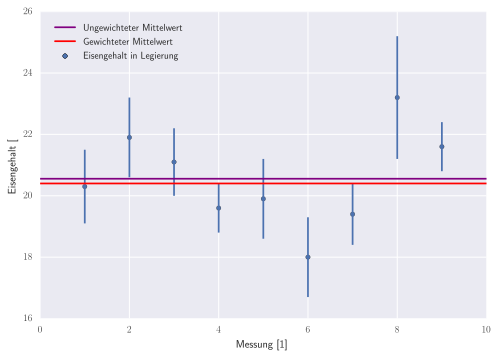

In [5]:
# Plot all data

ax = df.plot(yerr=df['error'], kind='scatter', x='measurement', y='content', label='Eisengehalt in Legierung')
plt.axhline(y=mean, axes=ax, color='purple', label='Ungewichteter Mittelwert')
plt.axhline(y=weightedmean, axes=ax, color='red', label='Gewichteter Mittelwert')
plt.xlabel('Messung [1]')
plt.xlim([0, len(df['content']) + 1])
plt.ylabel('Eisengehalt [%]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

#plt.savefig('eisengehalt.pgf')

## Federkonstante
### Messwerte

In [6]:
# Evaluate Data

# Read Data
df = pd.read_csv('data/federkonstante.csv')

# Find best values with a fit
def spring(z, k, F0):
    return k * z + F0

values, covar = curve_fit(spring, df['z'], df['F'])

F_fit = [spring(z, values[0], values[1]) for z in df['z']]

### Rechnung mittels Taschenrechner

### Linear Regression

#### Mit dem Rechner

Die Steigung der Regressionsgeraden und somit die Federkonstante $k$ wird wie folgt erhalten:

<center>
    $k$ = $\frac{\sum_{i=1}^{10}(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^{10}(x_i-\overline{x})^2}$ = {{'{0:.2f}'.format(values[0])}}$\frac{N}{m}$
</center>

Der zugehörige Achsenabschnitt und somit die Ruhekraft $F_0$ errechnet sich aus:

<center>
    $F_0$ = $\overline{y} - k \cdot \overline{x}$ = {{'{0:.2f}'.format(values[1])}}N
</center>

Die empirische Korrelation ist:

<center>
    $r_{xy}$ = $\frac{\sum_{1}^{10}(x_i - \overline{x}) \cdot (y_i - \overline{y})}{\sqrt{\sum_{1}^{10}(x_i-\overline{x})^2 \cdot \sum_{1}^{10}(y_i-\overline{y})^2}}$
</center>

mit zugehörigem Bestimmtheitsmass:

<center>
    $R^{2}$ = $r_{xy}^2$
</center>

#### Mit scipy

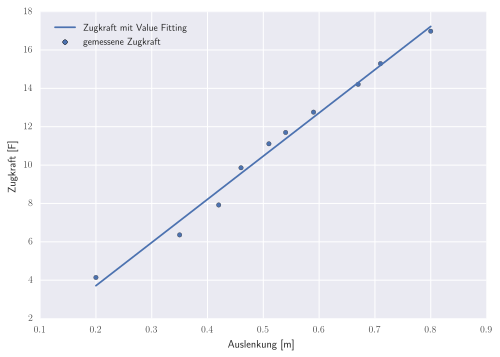

In [7]:
# Plot all data
ax = df.plot(kind='scatter', x='z', y='F', label='gemessene Zugkraft')
plt.plot(df['z'], F_fit, axes=ax, label='Zugkraft mit Value Fitting')
plt.xlabel('Auslenkung [m]')
plt.ylabel('Zugkraft [F]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

In [15]:
# Evaluate Data
np.seterr(all='print')

# Read Data
df = pd.read_csv('data/pendel.csv')

def pendulum(t, A, l, f, d, y0):
    return A * np.exp(-l*t)*np.sin(2*math.pi*f*t-d)+y0

values, covar = curve_fit(pendulum, df['t'], df['y'])
y_fit = [pendulum(t, values[0], values[1], values[2], values[3], values[4]) for t in df['t']]

s = np.seterr(all='warn')

## Offset, Amplitude, Frequenz und Phase eines Pendels

Von einem Pendel ist die Auslenkung in y-Richtung zu verschiedenen Zeitpunkten $t_i$ bekannt.
Mithilfe der Methode der kleinsten Quadrate können Offset, Amplitude, Frequenz und Phase des Pendels bestimmt werden.
Die Funktion des Pendels welche mit dem Fit angenähert wird schreibt sich wie folgt:

<center>
    $y(t)$ = $A\cdot exp(-\Gamma\cdot t)\cdot sin(2\cdot\pi\cdot f\cdot t-\delta)+y_0$
</center>

### Messwerte

TODO:

### Value Fitting

Mit der Methode der Chi-Quadrate (nichtlineare Regression) wurden durch scipy die folgenden besten Werte ermittelt:

<center>
    $A$ = {{'{0:.2f}'.format(values[0])}}m  
    $\Gamma$= {{'{0:.2f}'.format(values[1])}}$\frac{1}{s}$  
    $f$ = {{'{0:.2f}'.format(values[2])}}Hz  
    $\delta$ = {{'{0:.2f}'.format(values[3])}}  
    $y_0$ = {{'{0:.2f}'.format(values[4])}}m
</center>

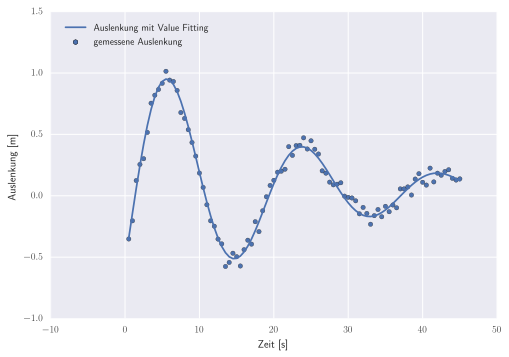

In [9]:
# Plot all data
ax = df.plot(kind='scatter', x='t', y='y', label='gemessene Auslenkung')
plt.plot(df['t'], y_fit, axes=ax, label='Auslenkung mit Value Fitting')
plt.xlabel('Zeit [s]')
plt.ylabel('Auslenkung [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

In [10]:
# Read data

# Calculate parameters of fit
import functools
df = pd.read_csv('data/tiefpass.csv')
Ue = 4
R = 500

def Ua(Ue, R, f, C):
    return Ue / 2 / np.sqrt(1+(2*math.pi*f*C*R)**2)

def phi(R, f, C):
    return np.arctan(-2*math.pi*f*R*C)/2/math.pi*360
    
values_Ua, covar = curve_fit(functools.partial(Ua, Ue, R), df['f'], df['Ua'].div(2))
f_fit = np.linspace(0, df['f'][len(df['f'])-1], 1000)
Ua_fit = [Ua(Ue, R, f, -values_Ua[0]) * 2 for f in f_fit]

values_phi, covar = curve_fit(functools.partial(phi, R), df['f'], df['phi'])
f_fit = np.linspace(0, df['f'][len(df['f'])-1], 1000)
phi_fit = [phi(R, f, values_phi[0]) for f in f_fit]

## Tiefpass
### Messwerte

<center>
    $U_e$ = {{Ue}}$V_{pp}$ => ±{{Ue / 2}}^V  
    $R$ = {{R}}$\Omega$
</center>

### Berechnung von C

Die Kapazität C kann durch zwei verschiedene Funktionen bestimmt werden:

<center>
    $Û_a$ = $\frac{Û_e}{\sqrt{1+(2\pi fCR)^2}}$  
    $\phi$ = $\arctan(-\omega RC)$
</center>

Die Kapazität kann mit einem Fit an die Ausgangsspannung $U_a$ auf

<center>
    $C$ = {{'{0:.2f}'.format(-values_Ua[0] * 1e6)}}$\mu$ F
</center>

und mit einem Fit an die Phase $U_a$ auf

<center>
    $C$ = {{'{0:.2f}'.format(values_phi[0] * 1e6)}}$\mu$ F
</center>
    
bestimmt werden.



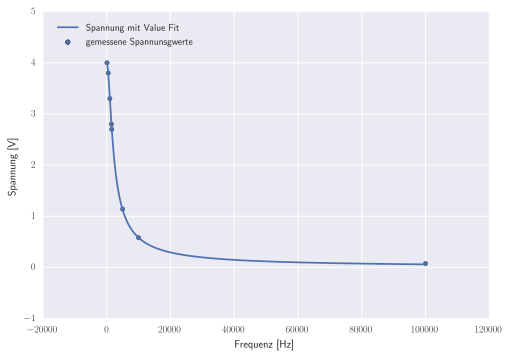

In [11]:
# Plot all data

ax = df.plot(kind='scatter', x='f', y='Ua', label='gemessene Spannunsgwerte')
plt.plot(f_fit, Ua_fit, axes=ax, label='Spannung mit Value Fit')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Spannung [V]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

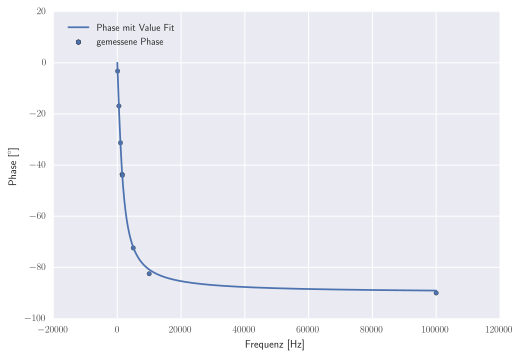

In [12]:
# Plot all data

ax = df.plot(kind='scatter', x='f', y='phi', label='gemessene Phase')
plt.plot(f_fit, phi_fit, axes=ax, label='Phase mit Value Fit')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [$^{\circ}$]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

# Resultate und Diskussion

